In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from time import time
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import metrics


In [2]:
df=pd.read_csv("banking.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [6]:
df.shape

(41188, 21)

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
le=LabelEncoder()
df["marital"]= le.fit_transform(df["marital"])


In [9]:
df.describe()

,age,marital,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,1.172769,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.608902,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,1.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,2.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,3.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [11]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

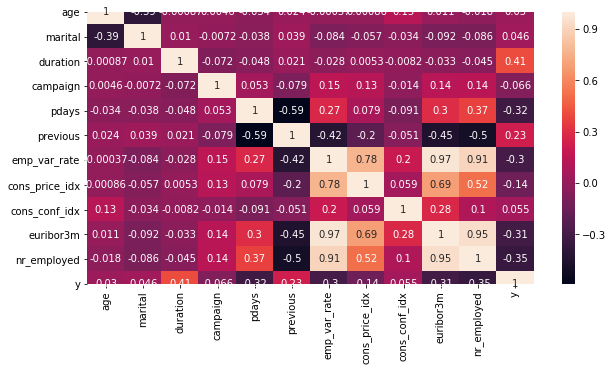

In [12]:
corr = df.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True)

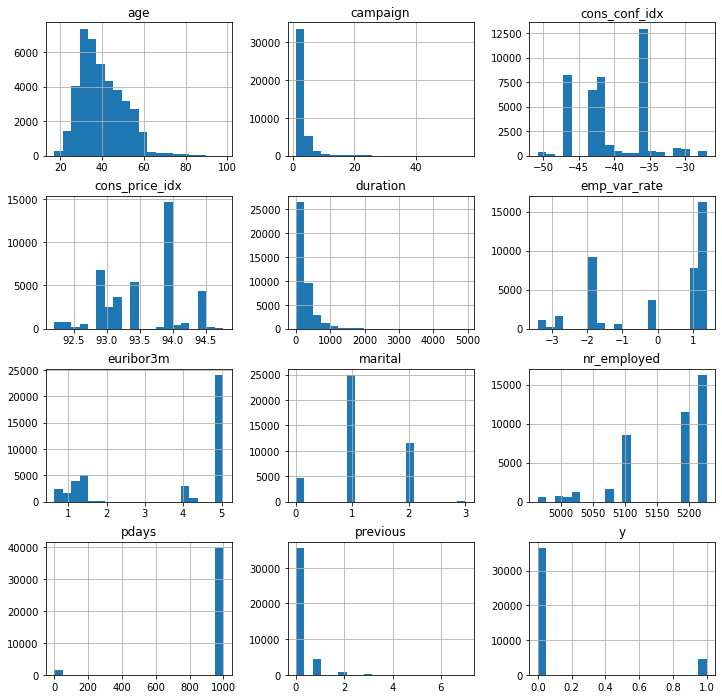

In [13]:
df.hist(bins=20,figsize=(12,12))
plt.show()

In [14]:
df.drop(["default"],axis=1,inplace=True)


In [15]:
df.drop(["emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed"], axis=1, inplace=True)

In [16]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,44,blue-collar,1,basic.4y,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,0
1,53,technician,1,unknown,no,no,cellular,nov,fri,138,1,999,0,nonexistent,0
2,28,management,2,university.degree,yes,no,cellular,jun,thu,339,3,6,2,success,1
3,39,services,1,high.school,no,no,cellular,apr,fri,185,2,999,0,nonexistent,0
4,55,retired,1,basic.4y,yes,no,cellular,aug,fri,137,1,3,1,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,1,high.school,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,0
41184,31,housemaid,1,basic.4y,no,no,telephone,may,thu,196,2,999,0,nonexistent,0
41185,42,admin.,2,university.degree,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,0
41186,48,technician,1,professional.course,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,0


Text(0.5, 0, 'Duration of loan')

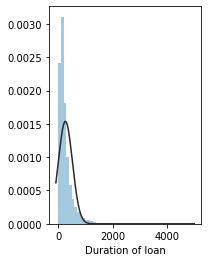

In [17]:
plt.subplot(1, 2, 1)
sns.distplot(df.duration, kde=False, fit = norm)
plt.xlabel('Duration of loan')

In [18]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df=MultiColumnLabelEncoder(columns = ['housing','loan','contact','job','education','month','day_of_week','poutcome']).fit_transform(df)

In [19]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,44,1,1,0,2,0,0,1,2,210,1,999,0,1,0
1,53,9,1,7,0,0,0,7,0,138,1,999,0,1,0
2,28,4,2,6,2,0,0,4,2,339,3,6,2,2,1
3,39,7,1,3,0,0,0,0,0,185,2,999,0,1,0
4,55,5,1,0,2,0,0,1,0,137,1,3,1,2,1


In [20]:
features=df.drop(["y"],axis=1)
features.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,44,1,1,0,2,0,0,1,2,210,1,999,0,1
1,53,9,1,7,0,0,0,7,0,138,1,999,0,1
2,28,4,2,6,2,0,0,4,2,339,3,6,2,2
3,39,7,1,3,0,0,0,0,0,185,2,999,0,1
4,55,5,1,0,2,0,0,1,0,137,1,3,1,2


In [21]:
target=df["y"]
target.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [22]:
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=.30,random_state=1000)
model = sm.OLS(target, features).fit()
predictions = model.predict(features)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.354
Method:                 Least Squares   F-statistic:                              1613.
Date:                Mon, 17 Feb 2020   Prob (F-statistic):                        0.00
Time:                        19:58:32   Log-Likelihood:                         -4471.0
No. Observations:               41188   AIC:                                      8970.
Df Residuals:                   41174   BIC:                                      9091.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0015      0.000     11.305      0.000       0.001       0.002
job             0.0010      0.000      2.803      0.005       0.000       0.002
marital         0.0226      0.002      9.683      0.000       0.018       0.027
education       0.0064      0.001     10.085      0.000       0.005       0.008
housing         0.0014      0.001      1.067      0.286      -0.001       0.004
loan           -0.0018      0.002     -0.993      0.321      -0.005       0.002
contact        -0.0612      0.003    -20.290      0.000      -0.067      -0.055
month           0.0015      0.001      2.557      0.011       0.000       0.003
day_of_week     0.0016      0.001      1.642      0.101      -0.000       0.003
duration        0.0005   5.14e-06     92.616      0.000       0.000       0.000
campaign       -0.0015      0.000     -3.045      0.002      -0.002      -0.001
pdays          -0.0002   6.43e-06    -35.603      0.000      -0.000      -0.000
previous        0.0973      0.003     28.819      0.000       0.091       0.104
poutcome        0.1000      0.004     26.146      0.000       0.092       0.107
==============================================================================
Omnibus:                    14065.871   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55202.371
Skew:                           1.676   Prob(JB):                         0.00
Kurtosis:                       7.574   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x, train_y)
pred = lr.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred)*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 90.2484421785223


In [24]:
dec=DecisionTreeRegressor()
#start = time()
dec.fit(train_x, train_y)
#end=time()
#train_time_dec=end-start
dec.score(test_x,test_y)
pred2 = dec.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred2)*100)
pred2

Accuracy: 87.36748401715627


array([0., 1., 0., ..., 0., 0., 0.])

In [25]:
classifier=RandomForestClassifier() 
classifier=classifier.fit(train_x,train_y)
predicted=classifier.predict(test_x) 
print ('Confusion Matrix :') 
print(confusion_matrix(test_y, predicted)) 
print ('Accuracy Score :',accuracy_score(test_y, predicted)) 
print ('Report : ') 
print (classification_report(test_y, predicted))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix :
[[10623   295]
 [  946   493]]
Accuracy Score : 0.8995710933074371
Report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10918
           1       0.63      0.34      0.44      1439

    accuracy                           0.90     12357
   macro avg       0.77      0.66      0.69     12357
weighted avg       0.88      0.90      0.89     12357



In [26]:
rf = RandomForestRegressor(random_state=10)
rf.fit(train_x,train_y)
rf.score(test_x,test_y)
pred3 = rf.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, pred3.round(),normalize=False)*100)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 1107900


In [27]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(train_x, train_y)
end=time()
tra_time_g=end-start
est.score(test_x,test_y)
pred4 = est.predict(test_x)



In [28]:
print("Accuracy:",metrics.accuracy_score(test_y, pred4)*100)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
cr=LinearRegression()
cr.fit(train_x,train_y)
y_pred=cr.predict(test_x)
LR=cr.score(test_x,test_y)
varL = explained_variance_score(y_pred,test_y)
LR

In [ ]:
model = RandomForestRegressor(random_state=10)
model.fit(train_x,train_y)
RS=model.score(test_x,test_y)
pred = model.predict(test_x)
varR = explained_variance_score(pred,test_y)
RS

In [ ]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(train_x, train_y)
end=time()
tra_time_g=end-start
gradient=est.score(test_x,test_y)
pred1 = est.predict(test_x)
varG = explained_variance_score(pred1,test_y)
gradient

In [ ]:
decision=DecisionTreeRegressor()
start = time()
decision.fit(train_x, train_y)
end=time()
train_time_dec=end-start
decision.predict(test_x)
decc=decision.score(test_x,test_y)

#varD = explained_variance_score(decpredict,test_y)
decc

In [ ]:
classifier=RandomForestClassifier() 
classifier=classifier.fit(train_x,train_y)
predicted=classifier.predict(test_x) 
print ('Confusion Matrix :') 
print(confusion_matrix(test_y, predicted)) 
print ('Accuracy Score :',accuracy_score(test_y, predicted)) 
print ('Report : ') 
print (classification_report(test_y, predicted))

In [ ]:
AllScore=[["Linear",LR,varL],["RandomForest",RS,varR],["GradientBoosting",gradient,varG],["DecisionTree",decc,varD]]
df_1 = pd.DataFrame(AllScore, columns = ['Model', 'Accuracy','Explained_variance_score']) 
df_1